In [1]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
import os

from model_utils import *

In [2]:
%store -r train_label
%store -r val_label
%store -r test_label

%store -r test_all
%store -r train_all
%store -r val_all

In [3]:
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

X_train, y_train = train_all, train_label
X_val, y_val = val_all, val_label
X_test, y_test = test_all, test_label

model = HistGradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)




test_probabilities = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC curve
val_probabilities = model.predict_proba(X_val)[:, 1] 



Validation Accuracy: 0.7247925511974403
Test Accuracy: 0.7063686022441316


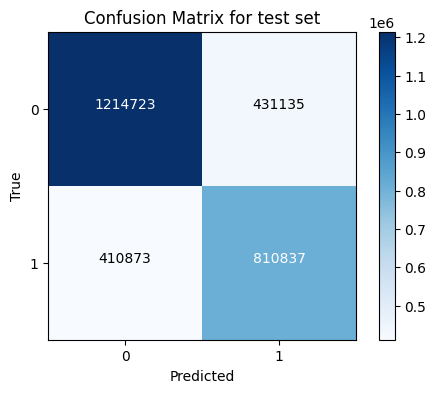

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74   1645858
           1       0.65      0.66      0.66   1221710

    accuracy                           0.71   2867568
   macro avg       0.70      0.70      0.70   2867568
weighted avg       0.71      0.71      0.71   2867568



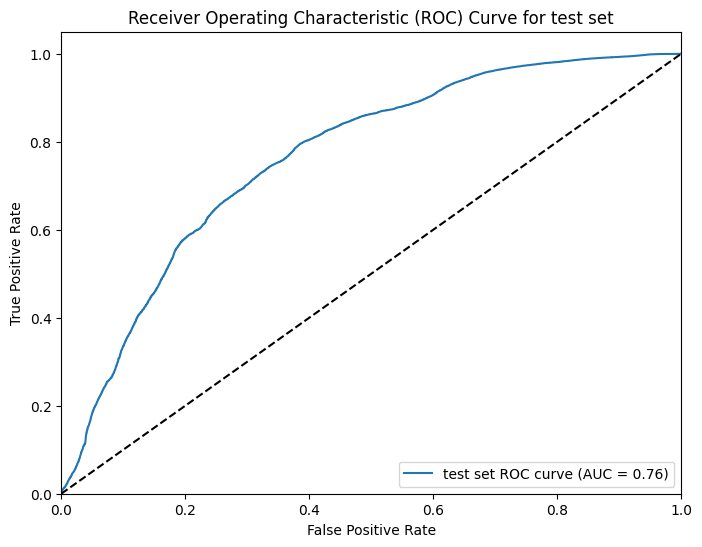

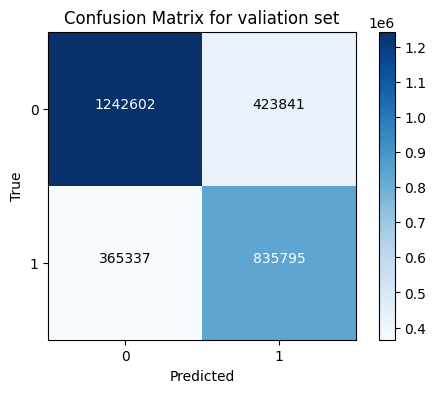

Classification Report for valiation set:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76   1666443
           1       0.66      0.70      0.68   1201132

    accuracy                           0.72   2867575
   macro avg       0.72      0.72      0.72   2867575
weighted avg       0.73      0.72      0.73   2867575



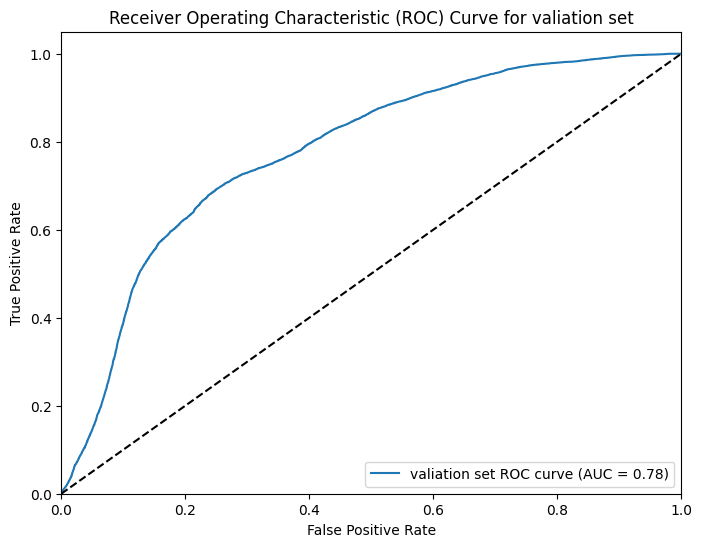

In [4]:
evaluate_model("test",y_test,test_predictions,test_probabilities)
evaluate_model("valiation",y_val,val_predictions,val_probabilities)